In [21]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
# from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestRegressor

In [22]:
li = []
li_test = []

train_data_desc = pd.read_csv("./df_with_200_descriptors_csv.csv")
test_data_desc = pd.read_csv("./df_test_csv.csv")

In [23]:
# test_data_desc.isnull().sum().head(210)
train_data_desc.fillna(train_data_desc.median(), inplace=True)
# train_data_desc.fillna(0)


In [24]:
test_data_desc 
# 75383

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,ID_vals
0,9.626968,0.025579,9.626968,0.025579,0.624614,164.248,148.120,164.120115,66,0,...,0,0,0,0,0,0,0,0,0,1682
1,12.473362,-4.605249,12.473362,0.061165,0.617511,431.452,414.316,431.056940,152,0,...,1,1,0,0,0,0,0,0,1,1656
2,14.627193,-4.140552,14.627193,0.064351,0.224134,696.264,655.944,695.250845,254,0,...,1,0,0,0,0,0,0,0,0,36
3,10.420833,-3.973958,10.420833,0.000000,0.393203,201.244,197.212,200.949810,56,0,...,0,0,0,0,0,0,0,0,0,1850
4,12.865865,-0.601027,12.865865,0.094949,0.639062,418.574,380.270,418.271924,168,0,...,0,0,0,0,0,0,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,12.851673,-4.443395,12.851673,0.048352,0.391778,408.376,389.224,408.129692,154,0,...,0,0,0,0,0,0,0,0,0,38
10990,11.617073,-0.992448,11.617073,0.147894,0.635519,320.344,304.216,320.104859,120,0,...,0,0,0,0,0,0,0,0,0,34
10991,12.406479,-4.356493,12.406479,0.049357,0.705120,381.370,366.250,381.074304,138,0,...,1,0,0,0,0,0,0,0,1,1640
10992,11.026605,-3.480301,11.026605,0.167292,0.540194,220.976,213.920,219.945901,66,0,...,0,0,0,0,0,0,0,0,0,28


In [25]:
# Dropping null values in training data 
# train_data_desc = train_data_desc.dropna()
# train_data_desc["HeavyAtomMolWt"] = train_data_desc["HeavyAtomMolWt"].fillna(train_data_desc["HeavyAtomMolWt"].mean())
# train_data_desc["ExactMolWt"] = train_data_desc["ExactMolWt"].fillna(train_data_desc["ExactMolWt"].mean())
# train_data_desc["NumValenceElectrons"] = train_data_desc["NumValenceElectrons"].fillna(train_data_desc["NumValenceElectrons"].mean())
# X = ['HeavyAtomMolWt', 'ExactMolWt', 'MolWt', 'MaxEStateIndex', 'MaxAbsEStateIndex','fr_thiazole', 'fr_unbrch_alkane', 'fr_thiocyan', 'fr_urea']
# # ,'NumRadicalElectrons','fr_sulfone','fr_term_acetylene','fr_tetrazole'
# scale = MinMaxScaler()
# features = train_data_desc[X]
# scale.fit(train_data_desc[X])
# train_data_desc[X] = scale.fit_transform(features.values)
# Replacing null value with 0 in test data 

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# train_data_desc['HeavyAtomMolWt'] = le.fit_transform(train_data_desc['HeavyAtomMolWt'])
# train_data_desc['ExactMolWt'] = le.fit_transform(train_data_desc['ExactMolWt'])
# train_data_desc['MolWt'] = le.fit_transform(train_data_desc['MolWt'])
# train_data_desc['MaxEStateIndex'] = le.fit_transform(train_data_desc['MaxEStateIndex'])
# train_data_desc['MaxAbsEStateIndex'] = le.fit_transform(train_data_desc['MaxAbsEStateIndex'])
# train_data_desc['fr_thiazole'] = le.fit_transform(train_data_desc['fr_thiazole'])
train_data_desc['expected'] = le.fit_transform(train_data_desc['expected'])

# test_data_desc = test_data_desc.fillna(test_data_desc.mean())
test_data_desc.fillna(test_data_desc.median(), inplace=True)
# test_data_desc.fillna(0)

In [26]:
X = train_data_desc.drop("expected",axis=1)
y = train_data_desc["expected"]

# v_threshold = VarianceThreshold(threshold=3)
# # v_threshold.fit_transform(X)
# # v_threshold.fit_transform(test_data_desc)
# v_threshold.fit(X)
# v_threshold.fit(test_data_desc)

# concol = [column for column in X.columns 
#           if column not in X.columns[v_threshold.get_support()]]
# X.drop(concol,axis=1)
# test_data_desc.drop(concol, axis=1)


In [43]:
# Using random forest algorithm 
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import RandomForestClassifier
# train_data_desc

In [27]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=80)
# X = pca.inverse_transform(pd.DataFrame(pca.fit_transform(X, y=None)))
# test_data_desc = pca.inverse_transform(pd.DataFrame(pca.fit_transform(test_data_desc)))

# X = pd.DataFrame(pca.fit_transform(X, y=None))
# test_data_desc = pd.DataFrame(pca.fit_transform(test_data_desc))

In [28]:
pca

PCA(n_components=80)

In [29]:
# model = DecisionTreeClassifier(random_state=13)
# model2 = XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100)
model = XGBClassifier(n_estimators=900, random_state=13) #learning rate
# model = RandomForestRegressor(random_state=13)
# model = HistGradientBoostingClassifier(random_state=13)
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)

In [30]:
model.fit(X,y)
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(X, y)

# np.set_printoptions(precision=3)
# print(fit.scores_)

# features = fit.transform(X)
# # Summarize selected features
# print(features[0:5,:])

# X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
# X_new.shape

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=900, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=13, ...)

In [31]:
predict = model.predict(X_test)
predict2 = le.inverse_transform(model.predict(test_data_desc))

# modelfit(XGBClassifier(n_estimators=900, eta=0.3, random_state=13, alpha=5), X, predict2)

# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# modelfit(xgb1, X, predict2)

# predict2 = model.predict(test_data_desc)
# predict2 = model.predict(test_data_desc)

In [32]:
from sklearn.metrics import f1_score

f1_score(y_test, predict, average=None).mean()

0.9990127989997966

In [33]:
print(np.count_nonzero(predict2==1))
print(np.count_nonzero(predict2==2))

112
10882


In [64]:
submission_file = pd.read_csv("./sample_submission.csv")

# 1354
# 9640

,0
0,2.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
21983,2.0
21984,2.0
21985,2.0
21986,2.0


In [65]:
submission_file.Predicted = predict2

In [67]:
submission_file.to_csv("Submission_file_rdkit_26.csv",index=False)

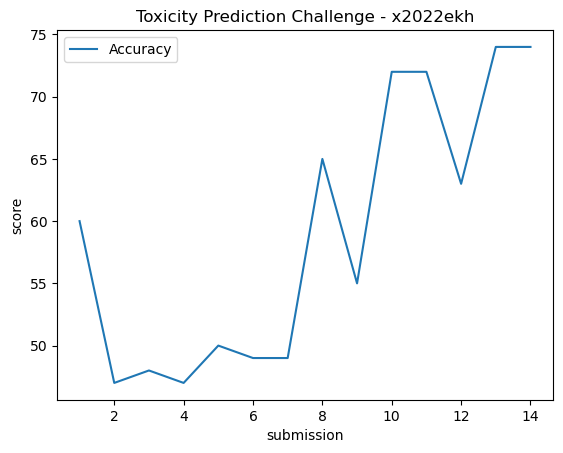

In [11]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [60, 47, 48, 47, 50, 49, 49, 65, 55, 72, 72, 63, 74, 74])
plt.xlabel('submission')
plt.ylabel('score')
plt.legend(['Accuracy'])
plt.title("Toxicity Prediction Challenge - x2022ekh")
plt.savefig('toxicityChallenge_x2022ekh.png')
plt.show()


In [563]:
# def morgan_fpts(data):
#     Morgan_fpts = []
#     for i in data:
#         mol = Chem.MolFromSmiles(i) 
#         fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
#         mfpts = np.array(fpts)
#         Morgan_fpts.append(mfpts)  
#     return np.array(Morgan_fpts)

In [564]:
Morgan_fpts = morgan_fpts(dataset['SMILES'])
Morgan_fpts.shape

NameError: name 'dataset' is not defined

In [485]:
# def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
#     if useTrainCV:
#         xgb_param = alg.get_xgb_params()
#         xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
#             metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
#         alg.set_params(n_estimators=cvresult.shape[0])
    
#     #Fit the algorithm on the data
#     alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
#     #Predict training set:
#     dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
#     #Print model report:
#     print ("\nModel Report")
#     print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [562]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# train_data_desc = pd.read_csv("./df_with_200_descriptors_csv.csv")
# # test_data_desc = pd.read_csv("./df_test_csv.csv")

# train_data_desc['expected'] = le.fit_transform(train_data_desc['expected'])

# X = train_data_desc.drop("expected",axis=1)
# y = train_data_desc["expected"]
# # len(y)
# # X, y = train_data_desc.columns.tolist()[:-1],
# #        train_data_desc.columns.tolist()[-1]
# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [10, 50, 100],
#            'colsample_bytree': [0.3, 0.7]}
# xgbr = XGBClassifier(seed = 20)
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# clf.fit(X, y)
# print("Best parameters:", clf.best_params_)
# # print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [537]:
# model2 = XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100)

In [538]:
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Lowest RMSE:  0.26741029509796105
